In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use("dark_background")

# plot colors female & male
color_f = 'hotpink'
color_m = 'royalblue'

### input for individual results

In [2]:
# number = 
# age    =      # age groups: U18, U20, U23, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80
# gender = ''    # M or F

### read data

In [3]:
df = pd.read_csv('marathon_results.csv', index_col=0)

df['time'] = pd.to_timedelta(df['time'])
df['time_min'] = df['time'].dt.total_seconds()/60

df

,number,age,sex,time,time_min
place,,,,,
1,5,H,M,0 days 02:06:16,126.266667
3,2,H,M,0 days 02:07:02,127.033333
5,16,H,M,0 days 02:07:47,127.783333
7,36,H,M,0 days 02:09:35,129.583333
9,9,30,M,0 days 02:09:43,129.716667
...,...,...,...,...,...
2818,F536,50,W,0 days 06:20:54,380.900000
2820,F1563,60,W,0 days 06:23:46,383.766667
2822,F878,H,W,0 days 06:26:18,386.300000


### overall stats

In [4]:
N_total = len(df['number'].unique())
print(f'{N_total} finishers')

N_male = df[df['sex'] == 'M'].shape[0]
print(f'{round(N_male/N_total*100)} % male')

hours,    remainder = divmod(df['time_min'].median(), 60)
minutes,  remainder = divmod(remainder, 1)
seconds = remainder * 60
print(f"median time: {int(hours)} hour, {int(minutes)} minutes, {int(seconds)} seconds")

12323 finishers
77 % male
median time: 3 hour, 52 minutes, 3 seconds


### finish time distribution

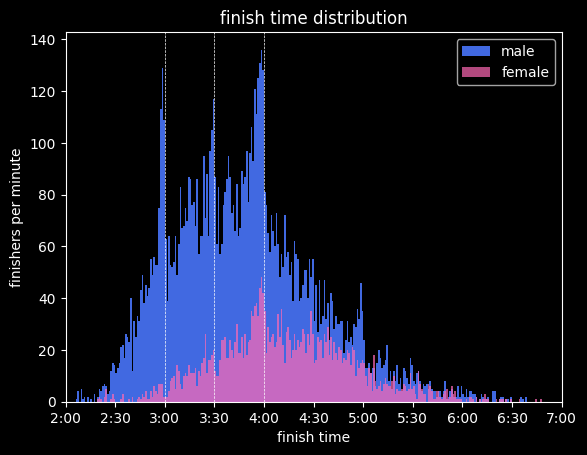

In [5]:
plt.hist(df.loc[df['sex'] == 'M' , 'time_min'], bins=range(2*60, 7*60, 1), color=color_m, label='male')
plt.hist(df.loc[df['sex'] == 'W' , 'time_min'], bins=range(2*60, 7*60, 1), color=color_f, label='female', alpha=0.7)

# plt.axvline(df.loc[df['number'] == number, 'time_min'].iloc[0], color='r', linestyle='dashed', linewidth=1, label=number)   # individual time
plt.axvline(3  * 60, color='w', linestyle='dashed', linewidth=.5)
plt.axvline(3.5* 60, color='w', linestyle='dashed', linewidth=.5)
plt.axvline(4  * 60, color='w', linestyle='dashed', linewidth=.5)
# plt.axvline(df['time_min'].median(), color='w', linestyle='dashed', linewidth=1, label='median')

plt.title('finish time distribution')
plt.xlabel('finish time')
plt.ylabel('finishers per minute')
plt.xticks(range(120, 421, 30), ['2:00', '2:30', '3:00', '3:30', '4:00', '4:30', '5:00', '5:30', '6:00', '6:30', '7:00'])
plt.xlim(120, 420)
plt.legend()

plt.savefig('finish_time_distribution.png', dpi=300, transparent=False)

### age distribution

In [ ]:
df_age_male   = df[df['sex'] == 'M'].groupby('age').agg({'time_min': 'median', 'number' : 'count'})
df_age_female = df[df['sex'] == 'W'].groupby('age').agg({'time_min': 'median', 'number' : 'count'})

df_age = pd.merge(df_age_male, df_age_female, on='age', suffixes=['_m','_f'], how='outer').reset_index()

df_age['number_f'] = df_age['number_f'].fillna(0).astype(int)
df_age['female_percentage'] = round(df_age['number_f'] / (df_age['number_m'] + df_age['number_f']) * 100 , 1)

df_age['age'] = df_age['age'].astype(str).str.extract(r'(\d+)').astype(float)


N_age = df_age['number_m'].sum() + df_age['number_f'].sum()
print(f'{round(N_age/N_total*100)} % finishers with age group')

df_age

100 % finishers with age group


,age,time_min_m,number_m,time_min_f,number_f,female_percentage
0,30.0,216.683333,1511,242.183333,518,25.5
1,35.0,210.908333,1462,246.541667,378,20.5
2,40.0,216.191667,1288,244.283333,336,20.7
3,45.0,225.475000,1080,253.133333,309,22.2
4,50.0,231.733333,827,259.608333,246,22.9
5,55.0,237.891667,626,271.241667,156,19.9
6,60.0,251.400000,331,275.300000,55,14.2
7,65.0,262.033333,134,288.433333,25,15.7
8,70.0,294.500000,48,296.000000,6,11.1
9,75.0,303.825000,12,362.200000,3,20.0


The bars are plotted individually because the age groups have different sizes and are mixed below, at or above the specified value.  
Furthermore, the frequencies are scaled to a group size of 5 years.

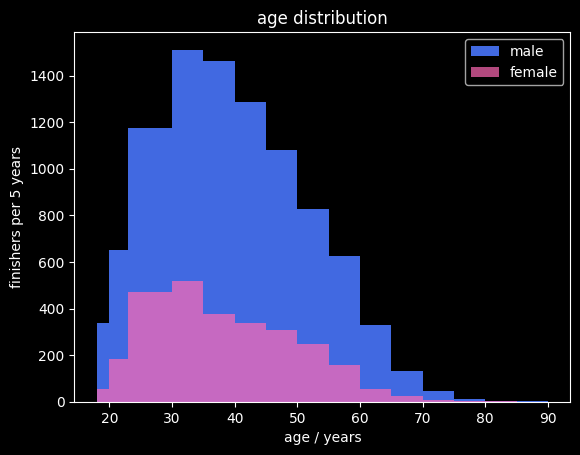

In [51]:
plt.bar(18, df_age['number_m'].iloc[13]*5/2, color=color_m, align='edge', width=2, label='male')
plt.bar(18, df_age['number_f'].iloc[13]*5/2, color=color_f, align='edge', width=2, label='female', alpha=0.7)

plt.bar(df_age['age'].iloc[13], df_age['number_m'].iloc[14]*5/3, color=color_m, align='edge', width=3)
plt.bar(df_age['age'].iloc[13], df_age['number_f'].iloc[14]*5/3, color=color_f, align='edge', width=3, alpha=0.7)

plt.bar(23, df_age['number_m'].iloc[12]*5/7, color=color_m, align='edge', width=7)
plt.bar(23, df_age['number_f'].iloc[12]*5/7, color=color_f, align='edge', width=7, alpha=0.7)

plt.bar(df_age['age'].iloc[:12], df_age['number_m'].iloc[:12], color=color_m, align='edge', width=5)
plt.bar(df_age['age'].iloc[:12], df_age['number_f'].iloc[:12], color=color_f, align='edge', width=5, alpha=0.7)

plt.xlabel('age / years')
plt.ylabel('finishers per 5 years')
plt.title('age distribution')
plt.legend()

# plt.savefig('age_distribution.png', dpi=300, transparent=True)

### median finish time by age

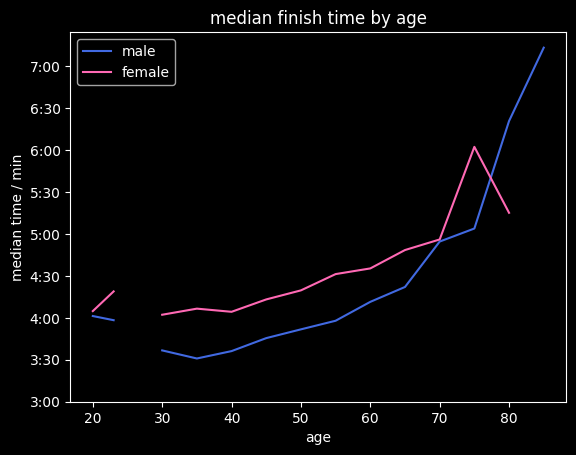

In [56]:
df_age.plot(x='age', y=['time_min_m','time_min_f'], color=[color_m, color_f], label=['male','female'])
plt.ylabel('median time / min')
plt.title('median finish time by age')
plt.yticks(range(3*60, 7*60+1, 30), ['3:00', '3:30', '4:00', '4:30', '5:00', '5:30', '6:00', '6:30', '7:00'])
plt.legend()

# plt.savefig('finish_time_age.png', dpi=300, transparent=True)

### individual results

In [53]:
df_gender = df[df['sex'] == gender]
df_gender.reset_index(drop=True, inplace=True)

position_gender = df_gender[df_gender['number'] == number].index[0] + 1

print(f'{position_gender}. of {N_male} finishers in gender group ({position_gender/N_male*100:.1f} %)')

NameError: name 'gender' is not defined

In [ ]:
df_gender_age = df_gender[df_gender['age'] == age]
df_gender_age.reset_index(drop=True, inplace=True)

N_gender_age = df_gender_age.shape[0]

position_gender_age = df_gender_age[df_gender_age['number'] == number].index[0] + 1

print(f'{position_gender_age}. of {N_gender_age} finishers in gender & age group ({position_gender_age/N_gender_age*100:.1f} %)')

342. of 612 finishers in gender & age group (55.9 %)
